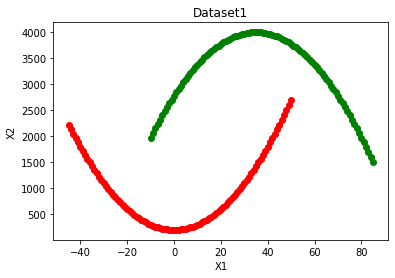

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from scipy.linalg import eigh, null_space

def plot_in_org():
    df = pd.DataFrame(pd.read_excel("D4.xlsx"))
    df_1 = df.dropna(axis=1,how='all')
    data1 = df_1
    colors = {'C1':'r', 'C2':'g'}
    fig, ax = plt.subplots()
    for i in range(len(data1['X1'])):
        ax.scatter(data1['X1'][i], data1['X2'][i],color=colors[data1['Class'][i]])
    ax.set_title('Dataset1')
    ax.set_xlabel('X1')
    ax.set_ylabel('X2')
    return data1

data1 = plot_in_org()

[[-0.01120991 -0.99993717]
 [-0.99993717  0.01120991]]


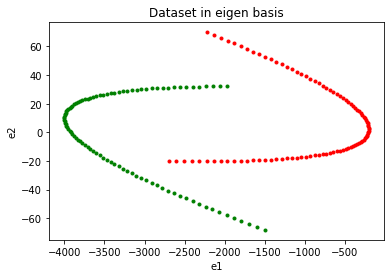

In [2]:
def calculate_eigen(data):    
    d1_array = data.to_numpy()
    X = np.array([[],[]])
    for i in range (len(d1_array)):
        X = np.append(X,[[d1_array[i][1]],[d1_array[i][2]]], axis= 1)
    cov = np.cov(X,ddof=0)
    e,trans = np.linalg.eig(cov)
    sort_index = np.argsort(-1*e)
    e = e[sort_index]
    trans = trans[:,sort_index]
    trans = trans.T
    Y = np.matmul(trans,X)
    Y = np.array(Y)
    print(trans)
    class1 = np.array([[],[]])
    class2 = np.array([[],[]])
    eig_class1 = np.array([[],[]])
    eig_class2 = np.array([[],[]])
    for i in range(len(d1_array)):
        if d1_array[i][3] == "C1":
            class1 = np.append(class1, [[d1_array[i][1]], [d1_array[i][2]]], axis=1)
            eig_class1 = np.append(eig_class1, [[Y[0][i]], [Y[1][i]]], axis=1)
        else:
            class2 = np.append(class2, [[d1_array[i][1]], [d1_array[i][2]]], axis=1)
            eig_class2 = np.append(eig_class2, [[Y[0][i]], [Y[1][i]]], axis=1)
    plt.plot(eig_class1[0],eig_class1[1],'r.')
    plt.plot(eig_class2[0],eig_class2[1],'g.')
    plt.title("Dataset in eigen basis")
    plt.xlabel('e1')
    plt.ylabel('e2')
    plt.show()
    return class1, class2, eig_class1, eig_class2
class1,class2, eig_class1, eig_class2 = calculate_eigen(data1)

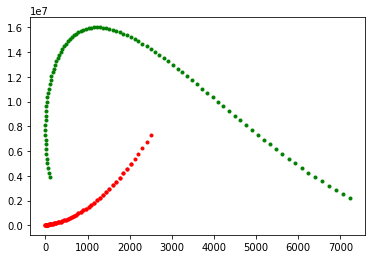

In [3]:
def non_linear_func(x_mat):
    return np.power(x_mat,[2])

z1_x = non_linear_func(class1[0])
z1_y = non_linear_func(class1[1])
z2_x = non_linear_func(class2[0])
z2_y = non_linear_func(class2[1])
plt.plot(z1_x,z1_y,'r.')
plt.plot(z2_x,z2_y,'g.')

eigen vectors [[-0.03341075  0.01312943]
 [ 0.00051934  0.00132157]]
eigen values [0.9947644  3.96047545]
d [[-0.99497224]
 [-0.10015106]]


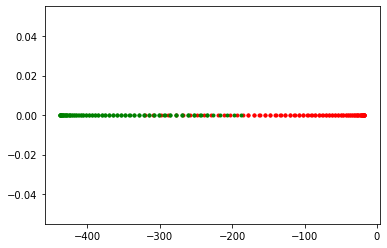

In [4]:
def generalized_eigen():
    cw1 = np.cov(class1)
    cw2 = np.cov(class2)

    cw = (cw1+cw2)/2

    data = np.concatenate((class1,class2),axis=1)

    ca = np.cov(data)

    eigvals, eigvecs = eigh(ca, cw, eigvals_only=False)
    
    return eigvals, eigvecs, ca, cw, data

val, vec, ca, cw, data = generalized_eigen()

print("eigen vectors",vec)
print("eigen values", val)

# s1 = val[0]
# m1 = (ca-(s1*cw))
s2 = val[1]
m2 = (ca-(s2*cw))
d = null_space(m2)
print("d",d)

out1 = np.dot(d.T,class1)
out2 = np.dot(d.T,class2)
y = np.zeros([1,96])
# out1 = m2_null * class1
# out2 = m2_null * class2
plt.plot(out1,y,"r.")
plt.plot(out2,y,"g.")
plt.show()

In [18]:
s2

3.960475446148865

<IPython.core.display.Javascript object>


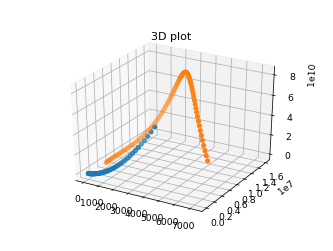

In [31]:
%matplotlib notebook
def data_in_3d(class1, class2):
#     class1 = class1.T
#     class2 = class2.T
    f1 = np.power(class1[0],[2])
    f2 = np.power(class1[1],[2])
    f3 = np.multiply(f1, f2) * 2
    ax = plt.axes(projection ='3d')
    ax.scatter3D(f1, f2, f3, 'red')
    g1 = np.power(class2[0],[2])
    g2 = np.power(class2[1],[2])
    g3 = np.multiply(g1, g2) * 2
    ax.scatter3D(g1, g2, g3, 'green')
    ax.set_title('3D plot')
    plt.show()
data_in_3d(class1, class2)

<IPython.core.display.Javascript object>


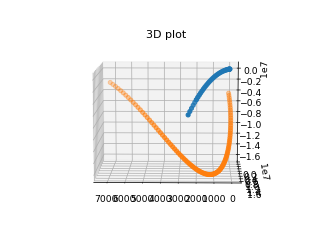

In [28]:
%matplotlib notebook
def data_in_3d(class1, class2):
#     class1 = class1.T
#     class2 = class2.T
    f1 = np.power(class1[0],[2])
    f2 = np.power(class1[1],[2])
#     f3 = np.multiply(f1, f2) 
    f3 = f1 - f2
    ax = plt.axes(projection ='3d')
    ax.scatter3D(f1, f2, f3, 'red')
    g1 = np.power(class2[0],[2])
    g2 = np.power(class2[1],[2])
#     g3 = np.multiply(g1, g2) 
    g3 = g1 - g2
    ax.scatter3D(g1, g2, g3, 'green')
    ax.set_title('3D plot')
    plt.show()
data_in_3d(class1, class2)